In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from scipy.stats import ttest_ind
from itertools import combinations
import math

%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

## Разведывательный анализ данных (EDA)

**Цель анализа**

Необходимо отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. 
Требуется определить признаки, которые влияют на результаты госэкзамена по математике.

**Основные этапы**
1. Первоначальный анализ датасета (типы, меры центральной тенденции и  изменчивости и др.)
2. Визуальный анализ признаков
3. Работа с отклонениями и их обработка
4. Очистка неккоректных данных и дубликатов
5. Оценка отсутствующих данных, определение способов их обработки
6. Корреляционный анализ количественных признаков (визуализация)
7. Анализ категориальных признаков (кол-во уникальных значений, boxplot, t-test)
8. Отбор признаков, влияющих на оценку и формулировка выводов

In [24]:
df = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-12+11MAR2020+type@asset+block/stud_math.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [25]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


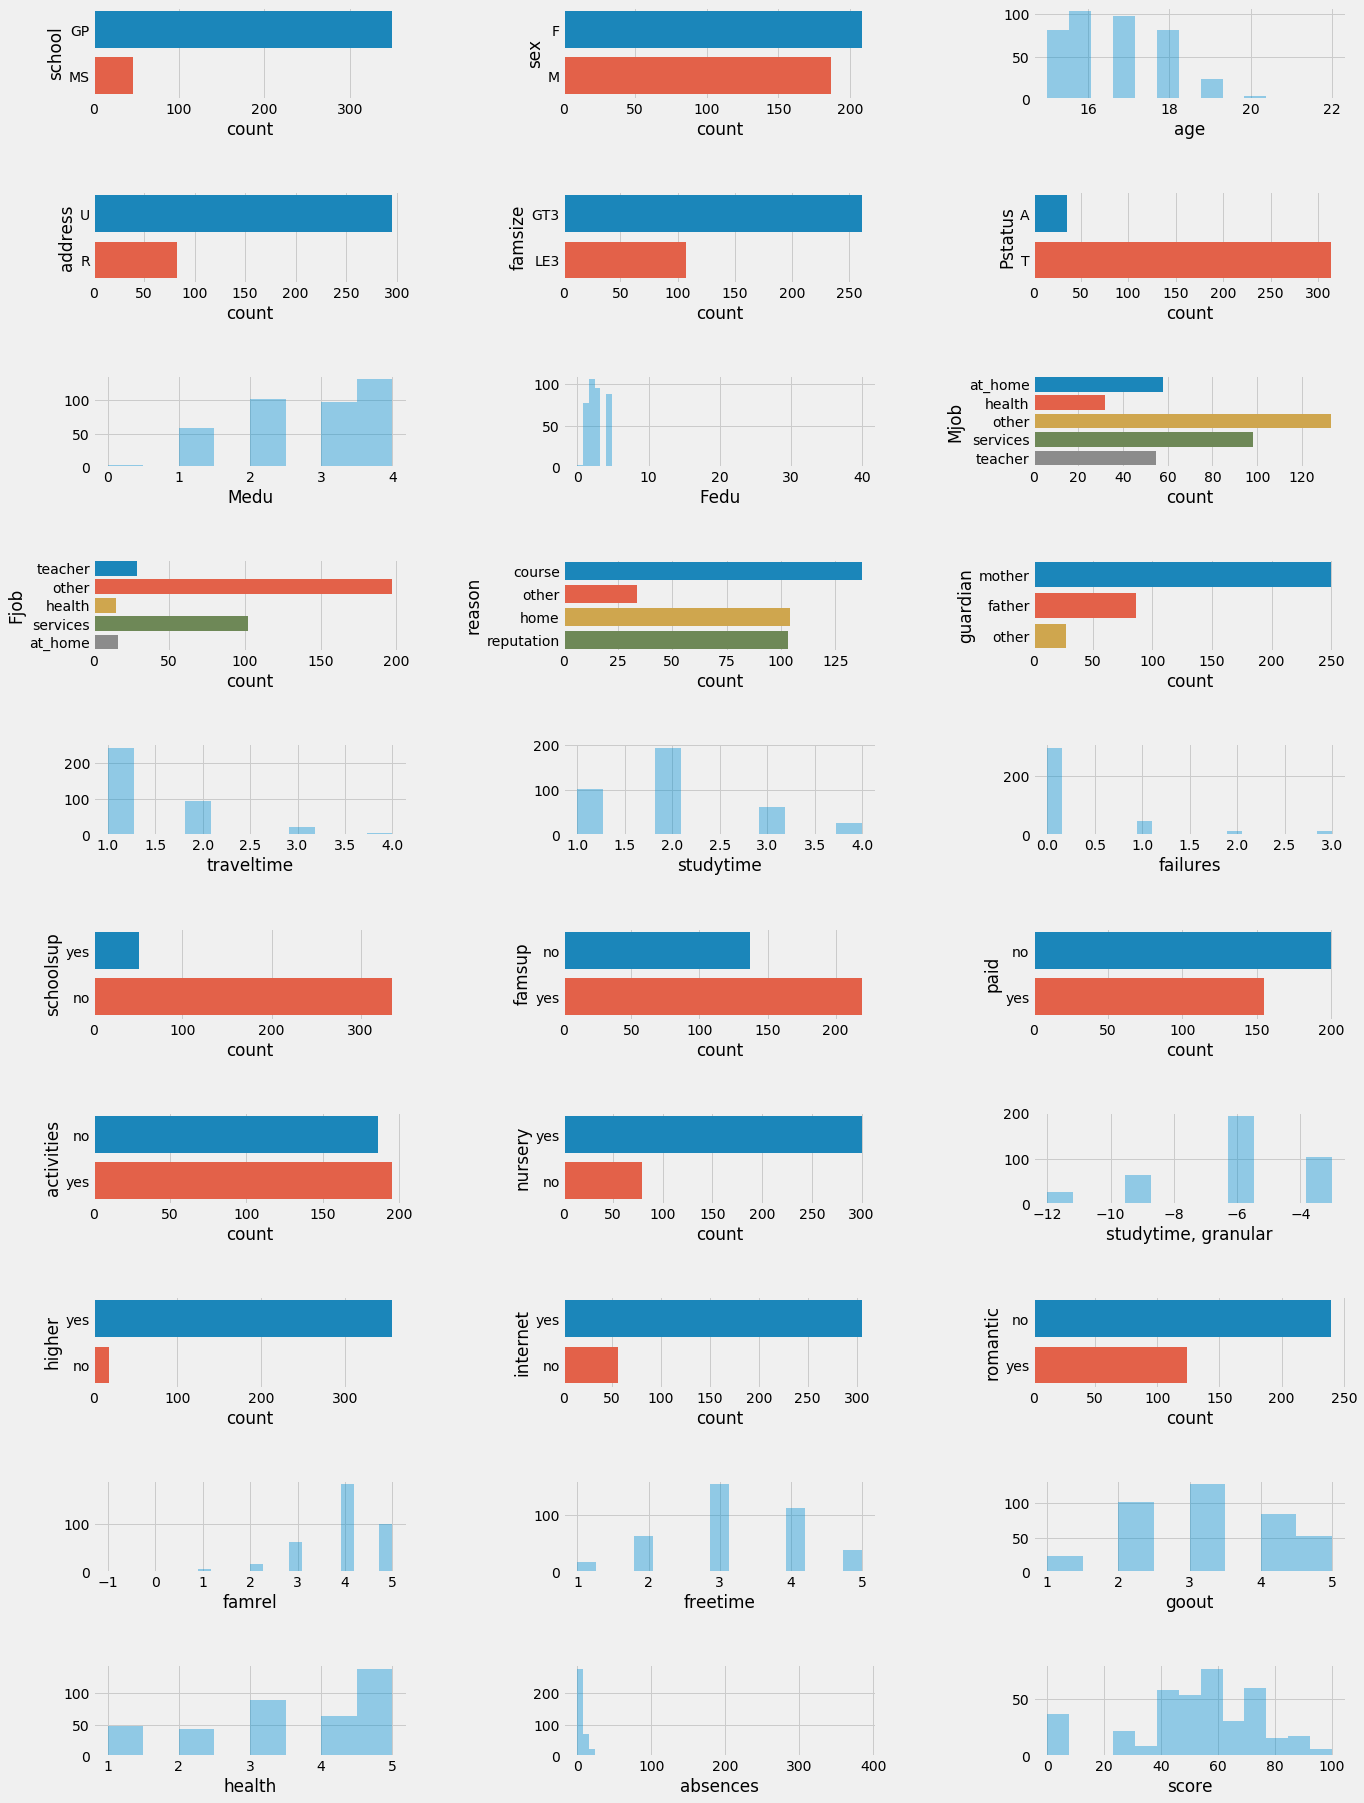

In [26]:
# *** Гистограммы распределения каждого признака ***


def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
        else:
            g = sns.distplot(dataset[column], kde=False)


plot_distribution(df, cols=3, width=20, height=30, hspace=1, wspace=0.5)

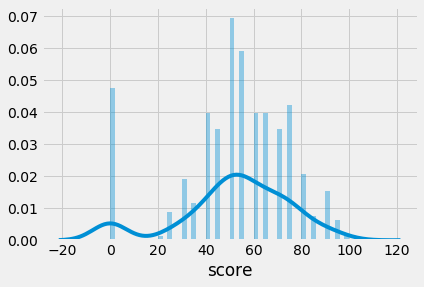

In [27]:
# *** Более подробная гистограмма целевого значения 'score' ***

sns.distplot(df['score'].dropna(), bins=50)

In [28]:
# *** Определение выбросов в 'absences' ***
# из гистограммы 'absences' видно что есть пиковые значения, поэтому можно проверить на выбросы


def define_outlers(column):
    median = df[column].median()
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    IQR = perc75 - perc25
    outler_min = perc25 - 1.5*IQR
    outler_max = perc75 + 1.5*IQR
    maximum = df[column].max()
    minimum = df[column].min()
    print('25-й перцентиль - {} /'.format(perc25),
          '75-й перцентиль - {} /'.format(perc75), "IQR - {} ".format(IQR))
    print('Границы выбросов - [{f}, {l}]'.format(f=outler_min, l=outler_max))
    print(
        'Кол-во max выбросов - {}'.format(df[df[column] > outler_max][column].count()))
    print(
        'Кол-во min выбросов - {}'.format(df[df[column] < outler_min][column].count()))
    print('Минимум - {}'.format(minimum))
    print('Максимум - {}'.format(maximum))

    display(df[df[column] > outler_max].sort_values(
        by='absences', ascending=False))


define_outlers('absences')

25-й перцентиль - 0.0 / 75-й перцентиль - 8.0 / IQR - 8.0 
Границы выбросов - [-12.0, 20.0]
Кол-во max выбросов - 17
Кол-во min выбросов - 0
Минимум - 0.0
Максимум - 385.0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
315,GP,F,19,R,GT3,T,2.0,3.0,other,other,reputation,other,1.0,3.0,1.0,no,no,no,no,yes,-9.0,yes,yes,yes,4.0,1.0,2.0,3.0,40.0,55.0
307,GP,M,19,U,GT3,NaN,4.0,4.0,teacher,services,reputation,other,2.0,1.0,1.0,no,yes,yes,no,yes,-3.0,yes,yes,yes,4.0,3.0,4.0,4.0,38.0,40.0
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,-3.0,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0


In [29]:
# *** Очистка некорретных данных ***

# видимо оишбки/опечатки
df.loc[df['Fedu'] == 40.0, 'Fedu'] = 4.0
df.loc[df.famrel == -1, 'famrel'] = 1

# удаляем колонку 'studytime, granular' так как она идентична колонке 'studytime' / 3
df.drop('studytime, granular', axis=1, inplace=True)

# удаляем запись с максимум 'absences' так как это скорее всего ошибочное значение которое превышает количество дней в году
index_for_remove = df[df['absences'] == df['absences'].max()].index[0]
df.drop([index_for_remove], inplace=True)

In [30]:
# для проверки гипотезы, что нулевой бал получили ученики которые просто не ходили на сдачу 
# и соответственно это не должно учитываться при определение влияющих на оценку признаков
# удаляем наблюдения (строки) с нулевым баллом

# df.drop(df[df['score'] == 0].index, inplace=True)
# df['score'].value_counts()

In [31]:
# *** Проверка результатов очистки ***

df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,394.000000,391.000000,370.000000,366.000000,387.000000,372.000000,367.000000,383.000000,386.000000,379.000000,382.000000,388.000000
mean,16.697970,2.751918,2.516216,1.439891,2.038760,0.338710,3.948229,3.232376,3.111399,3.532982,6.290576,52.177835
std,1.277181,1.098876,1.089992,0.694751,0.843166,0.743929,0.899326,0.995170,1.112164,1.397596,13.289503,22.888039
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,212.000000,100.000000


In [32]:
# *** Поиск дубликатов ***

if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(
        by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


Your selected dataframe has 29 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
Pstatus,45,11.4
paid,40,10.2
famsup,38,9.6
Fjob,36,9.1
internet,34,8.6
romantic,31,7.9
guardian,31,7.9
traveltime,28,7.1
famrel,27,6.9
famsize,27,6.9


Preview of data with null values:


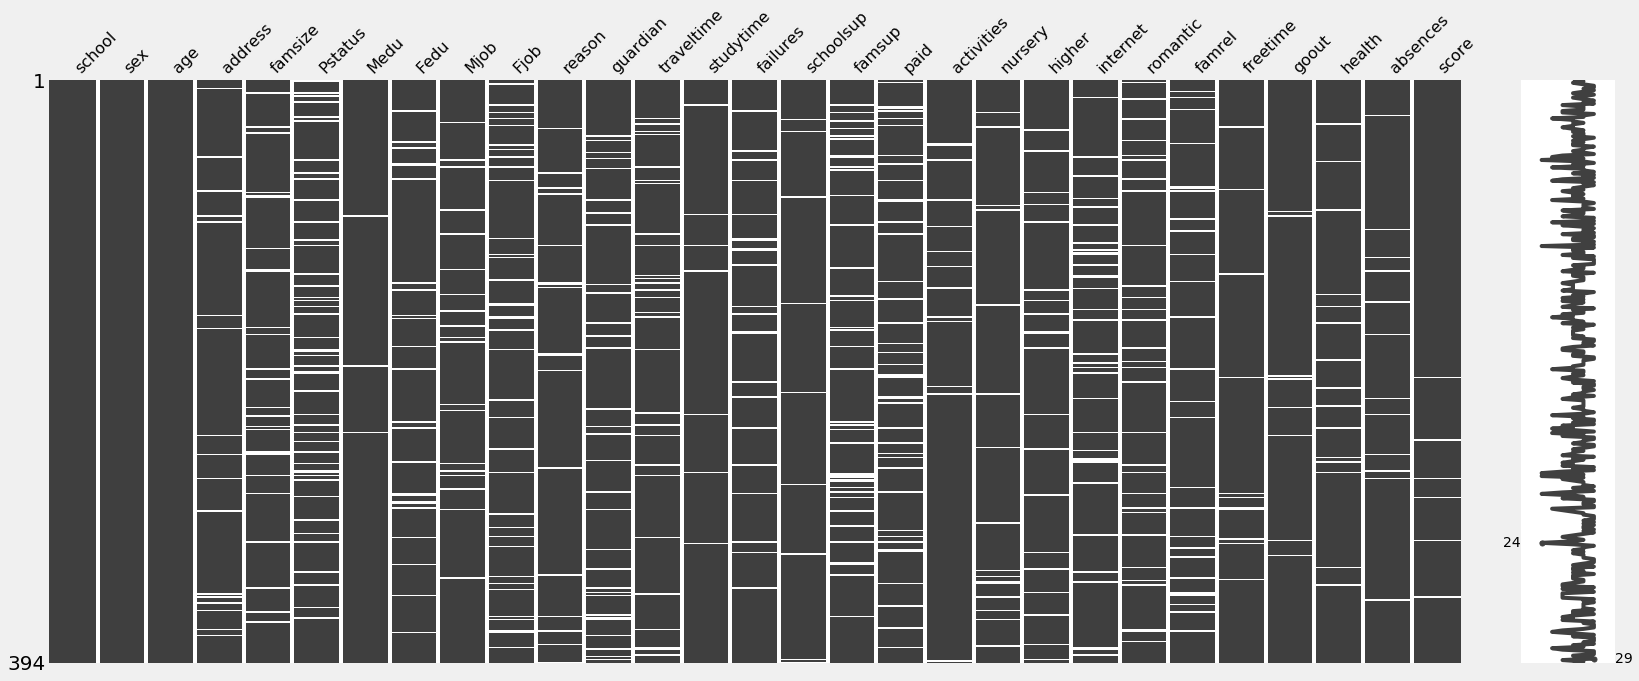

In [33]:
# *** Вычисление и визуализация данных с пустыми значениями ***


def missing_values_table(df):
    missing_numbers = df.isnull().sum()
    missing_percents = df.isnull().sum() / len(df) * 100
    missing_percents = missing_percents.apply(lambda x: round(x, 1))
    missing_table = pd.concat([missing_numbers, missing_percents], axis=1)
    missing_table.columns = ['Missing Values', '% of Total Values']
    return missing_table[missing_table['Missing Values'] != 0].sort_values(by='% of Total Values', ascending=False)


mis_val_df = missing_values_table(df)
print("Your selected dataframe has " + str(df.shape[1]) + " columns.\nThere are " + str(
    mis_val_df.shape[0]) + " columns that have missing values.")
display(mis_val_df)


if len(df.isnull().any(axis=1) != 0):
    print("Preview of data with null values:")
    missingno.matrix(df)
    plt.show()

In [34]:
# *** Обработка записей с отсутствующими данными ***

# так как нет записей более чем с 50% отсутствующими значениями то нет необходимости
# удалять их так как мы тогда потеряем значимые значения

# заполняем модой категориальные признаки кроме некоторых по которым можно определить более точный алгоритм заполнения
# также не заполняем количественные признаки
for col in mis_val_df.T:
    if col not in ['age', 'traveltime', 'absences', 'score']:
        df[col] = df[col].fillna(df[col].mode()[0])

# 'absense' средним значением
df['absences'] = df['absences'].fillna(df['absences'].mean())

# удаляем записи где 'score' = NaN
df.drop(df[df.score.isnull()].index, inplace=True)

# заполняем 'traveltime' по медиане 'traveltime' в записях по соответствующему типу адреса
mediana_R = df.groupby(['address'])['traveltime'].median().loc['R']
df.loc[df.address == 'R', 'traveltime'] = df.loc[df.address ==
                                                 'R', 'traveltime'].fillna(mediana_R)
mediana_U = df.groupby(['address'])['traveltime'].median().loc['U']
df.loc[df.address == 'U', 'traveltime'] = df.loc[df.address ==
                                                 'U', 'traveltime'].fillna(mediana_U)

# проверка какие отсутствующие данные остались
mis_val_df = missing_values_table(df)
print("Your selected dataframe has " + str(df.shape[1]) + " columns.\nThere are " + str(
    mis_val_df.shape[0]) + " columns that have missing values.")

Your selected dataframe has 29 columns.
There are 0 columns that have missing values.


In [35]:
# *** Установка типа category для категориальных признаков (все признаки кроме 'age', 'absences', 'score') ***

for col in df.select_dtypes(include='float64'):
    if col not in ['age', 'absences', 'score']:
        df[col] = df[col].apply(lambda x: int(x))

for col in df.columns:
    if col not in ['age', 'absences', 'score']:
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      388 non-null    category
 1   sex         388 non-null    category
 2   age         388 non-null    int64   
 3   address     388 non-null    category
 4   famsize     388 non-null    category
 5   Pstatus     388 non-null    category
 6   Medu        388 non-null    category
 7   Fedu        388 non-null    category
 8   Mjob        388 non-null    category
 9   Fjob        388 non-null    category
 10  reason      388 non-null    category
 11  guardian    388 non-null    category
 12  traveltime  388 non-null    category
 13  studytime   388 non-null    category
 14  failures    388 non-null    category
 15  schoolsup   388 non-null    category
 16  famsup      388 non-null    category
 17  paid        388 non-null    category
 18  activities  388 non-null    category
 19  nursery 

,age,absences,score
age,1.000000,0.208631,-0.154225
absences,0.208631,1.000000,0.006584
score,-0.154225,0.006584,1.000000


score       1.000000
absences    0.006584
age        -0.154225
Name: score, dtype: float64


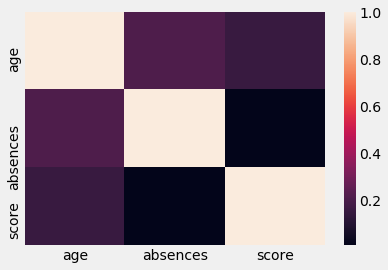

In [36]:
# *** Корреляционный анализ числовых признаков ***

corr = df.corr()
display(corr)
sns.heatmap(abs(corr))
print(corr['score'].sort_values(ascending=False))

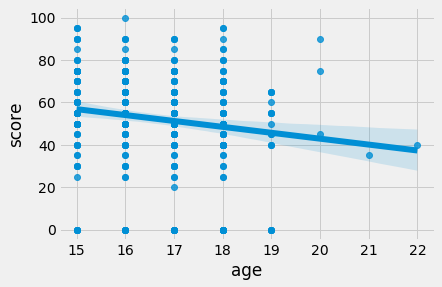

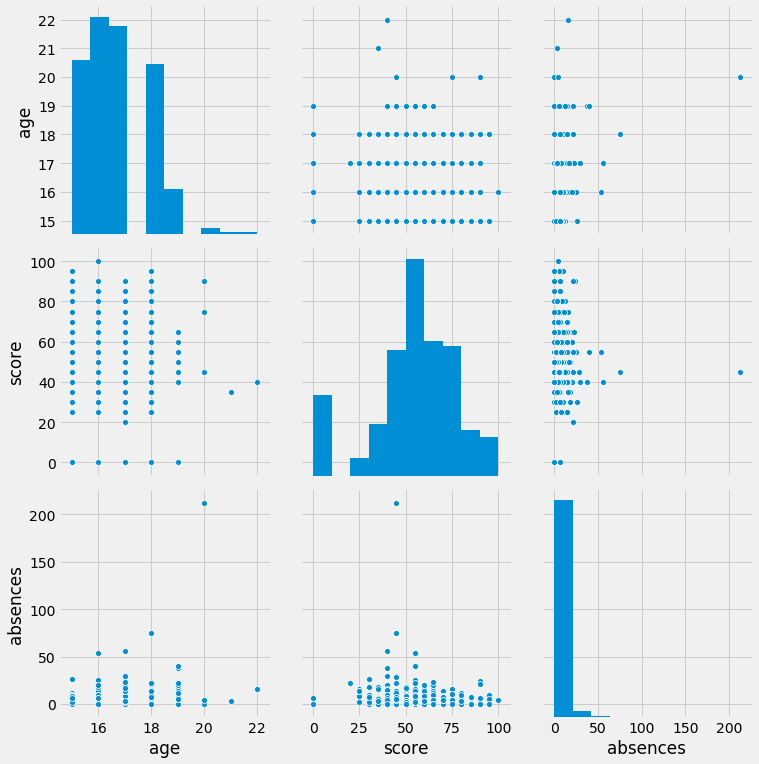

In [37]:
# *** Визуализация отношений между количественными парами признаков ***

sns.regplot(x=df['age'], y=df['score'])
sns.pairplot(df[['age', 'score', 'absences']], height=3.5)

In [38]:
# *** Оценка количества уникальных значений для категориальных (номинативных) ппризнаков ***

df.select_dtypes('category').nunique().sort_values(ascending=False)

health        5
freetime      5
famrel        5
Medu          5
Fedu          5
Mjob          5
Fjob          5
goout         5
failures      4
reason        4
traveltime    4
studytime     4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
Pstatus       2
famsize       2
address       2
sex           2
school        2
dtype: int64

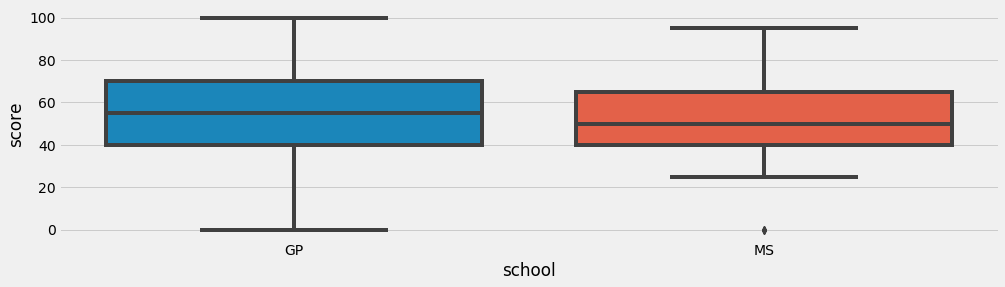

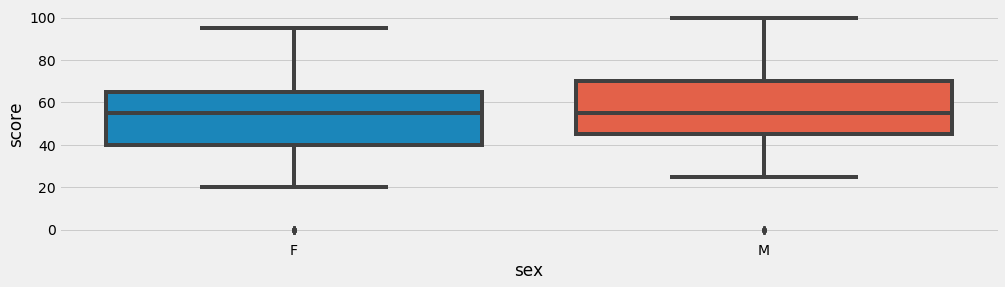

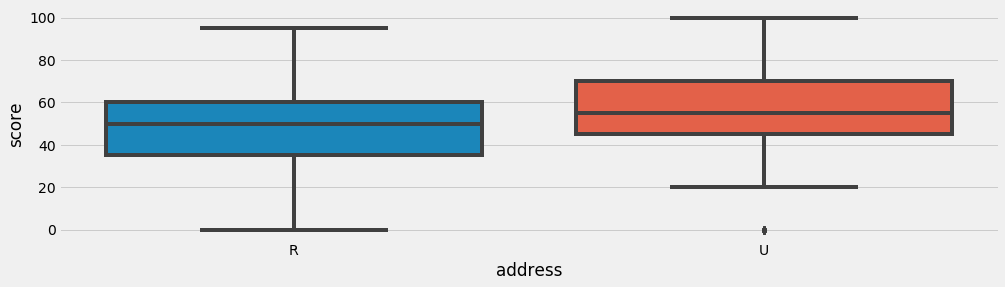

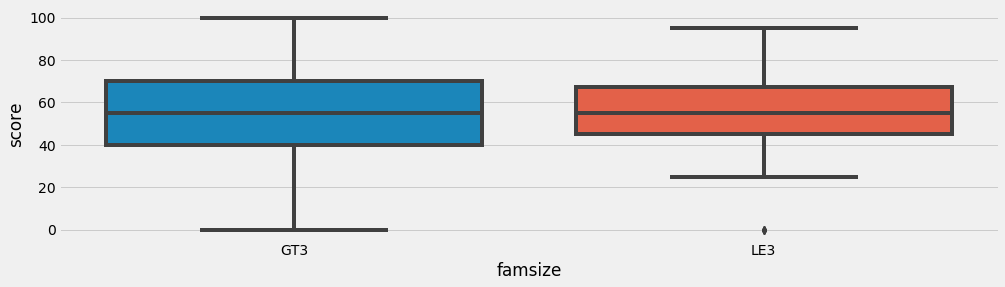

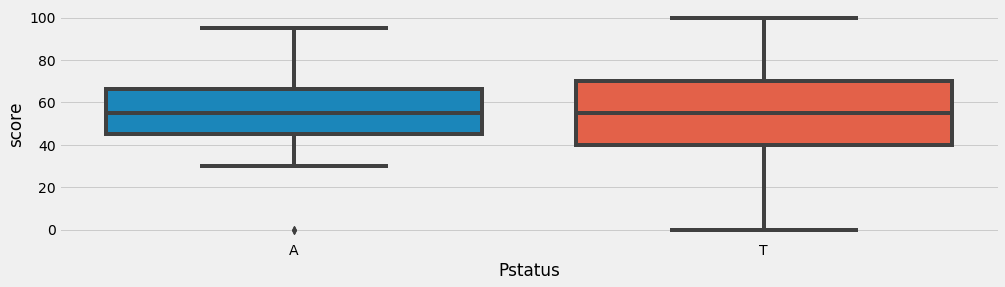

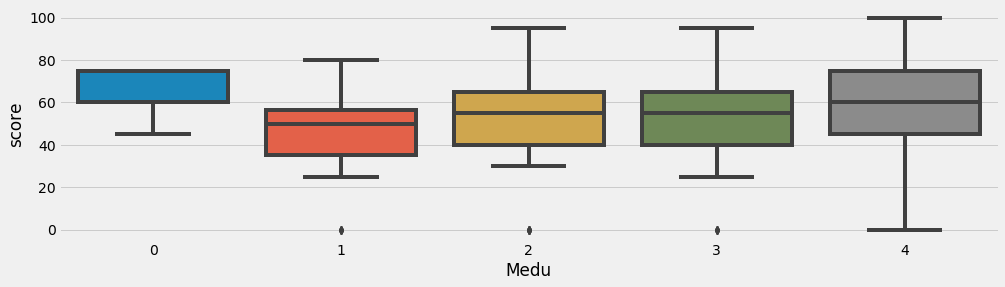

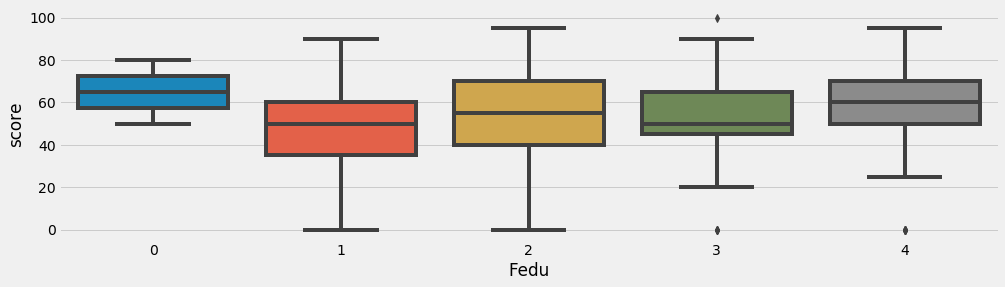

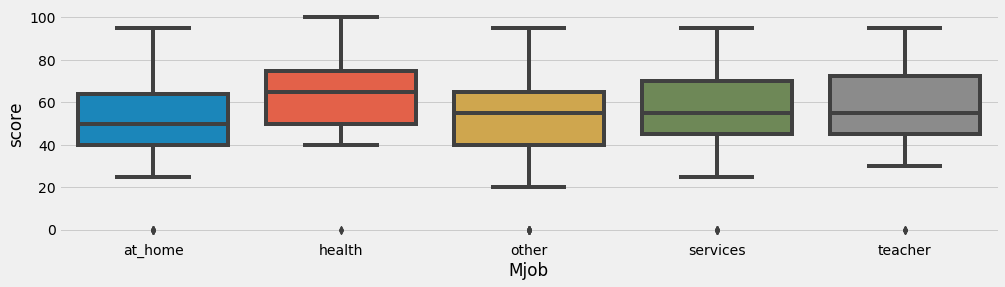

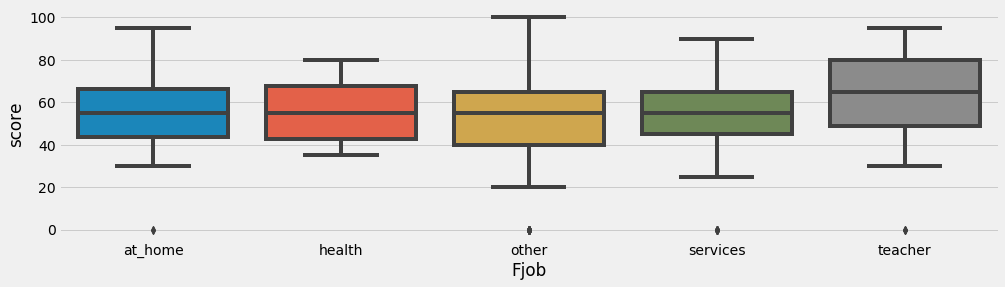

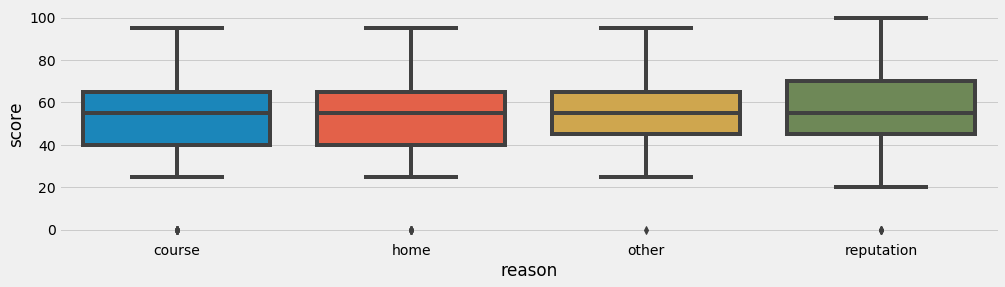

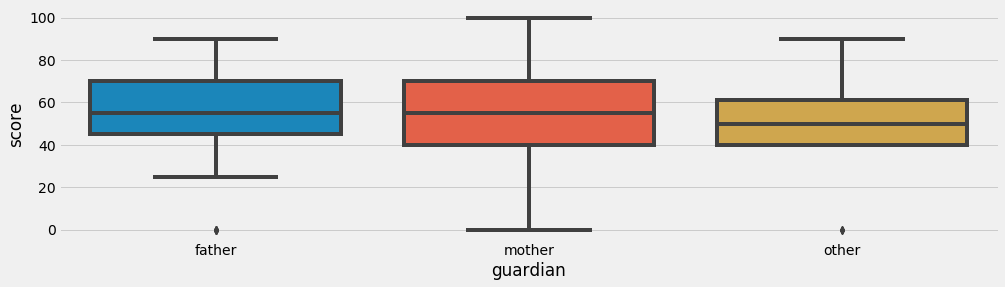

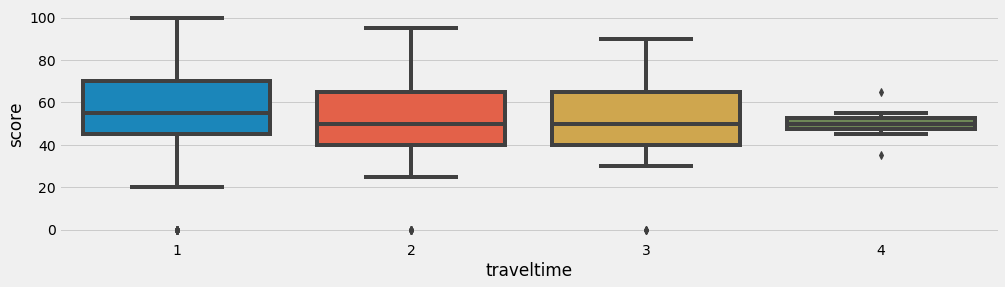

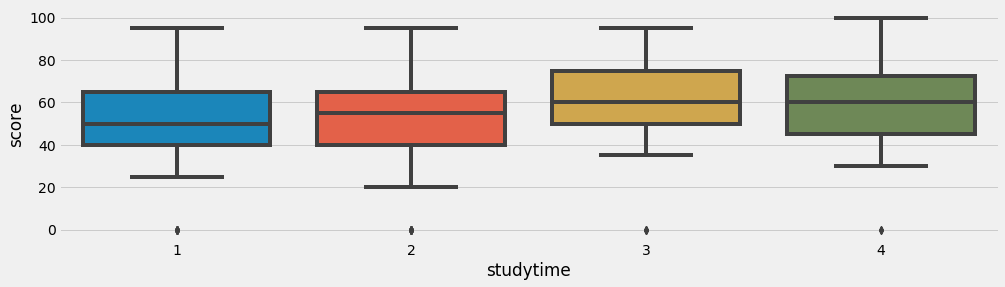

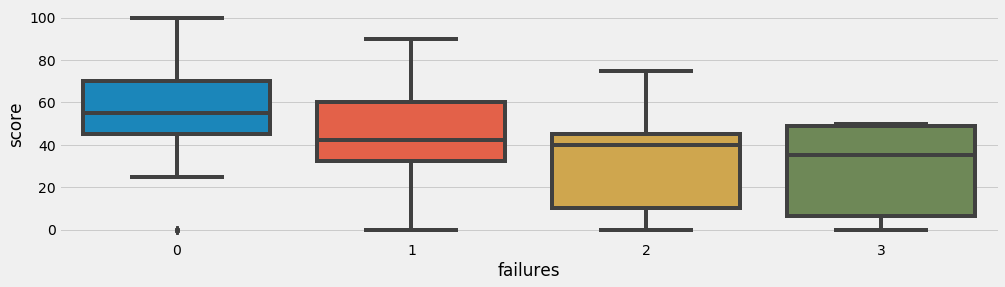

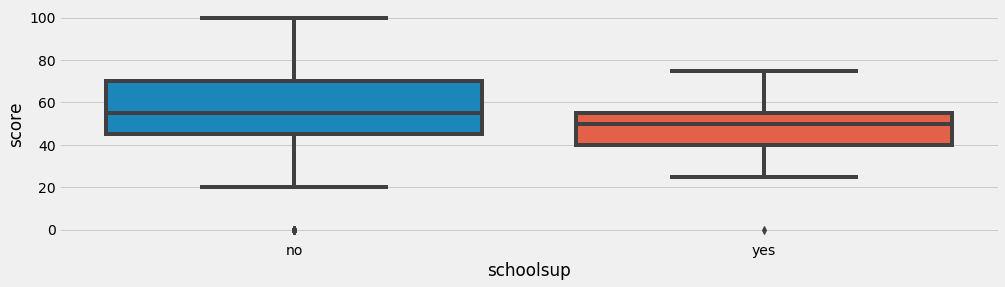

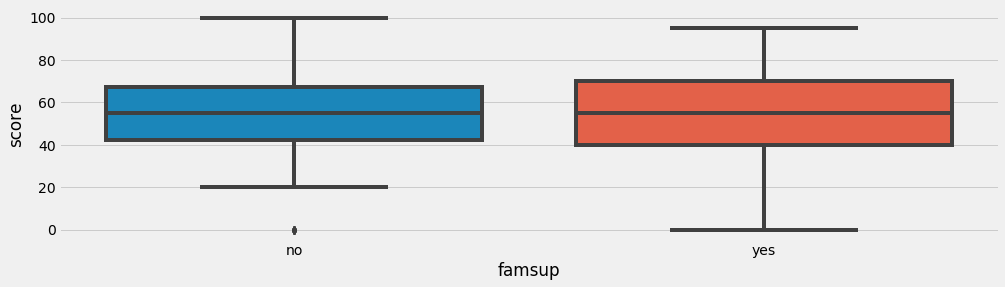

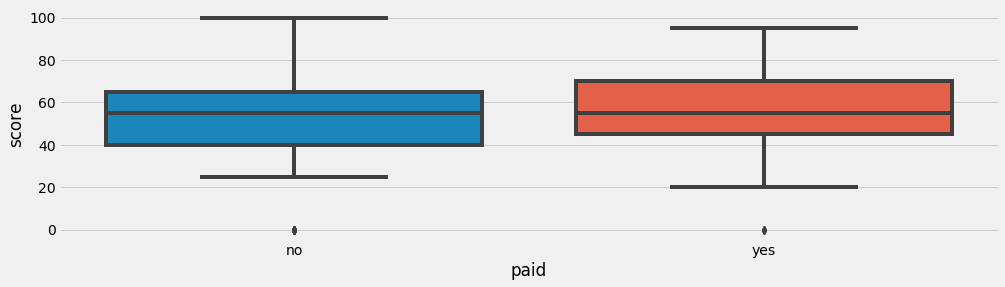

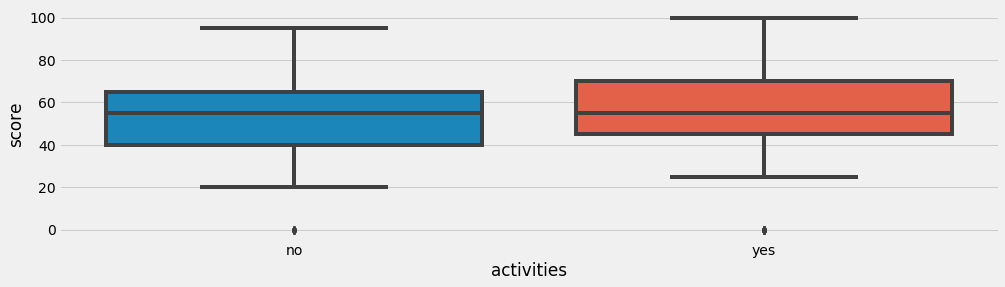

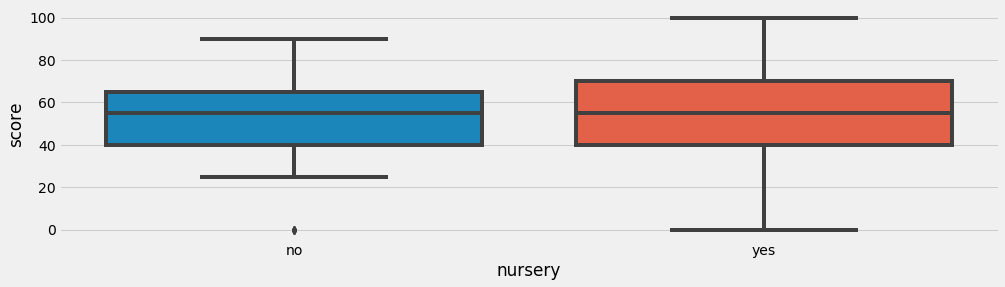

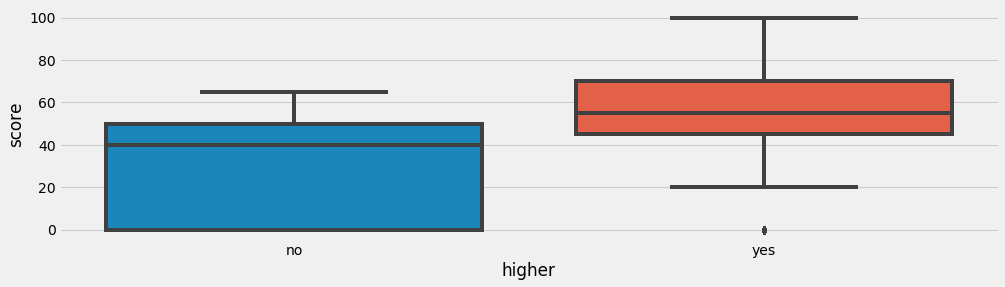

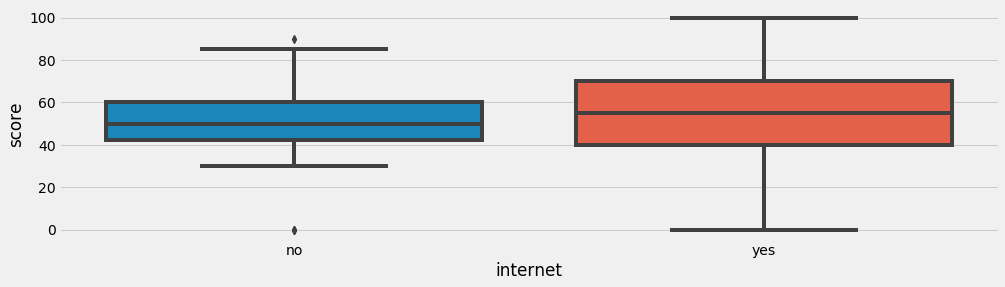

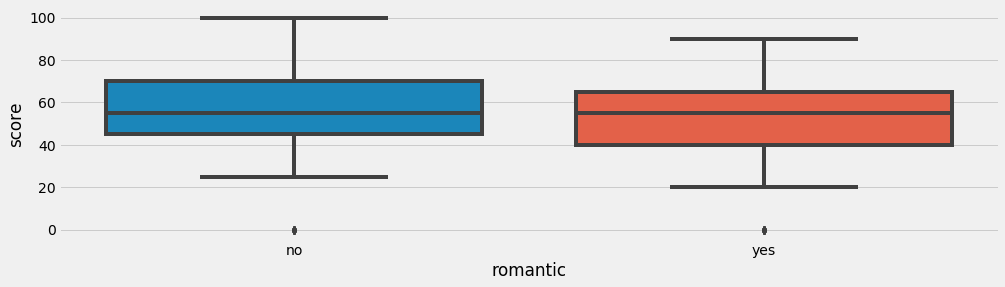

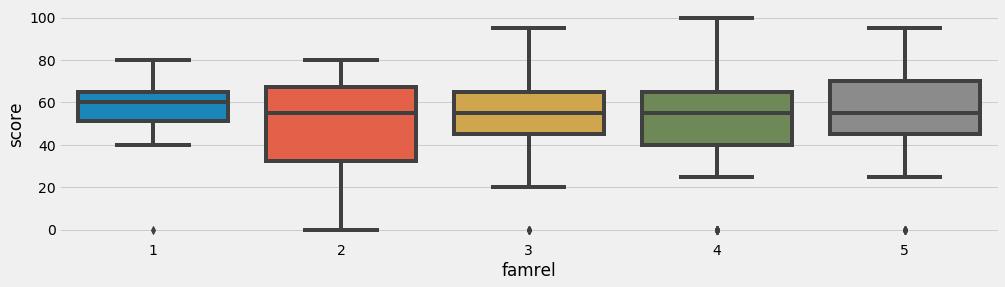

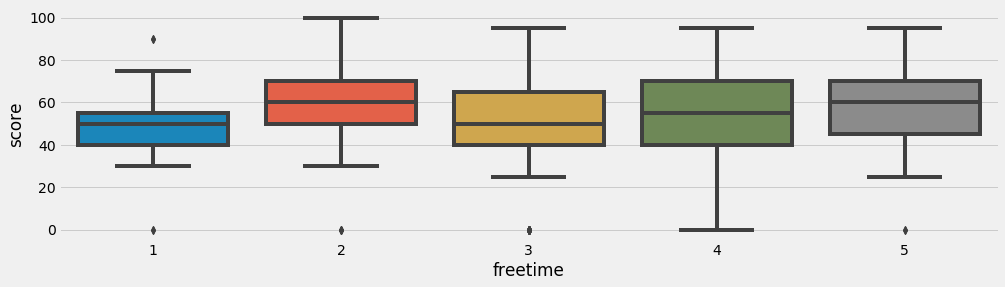

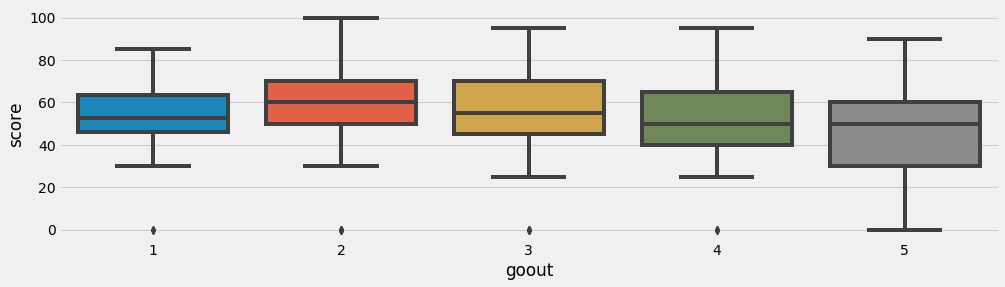

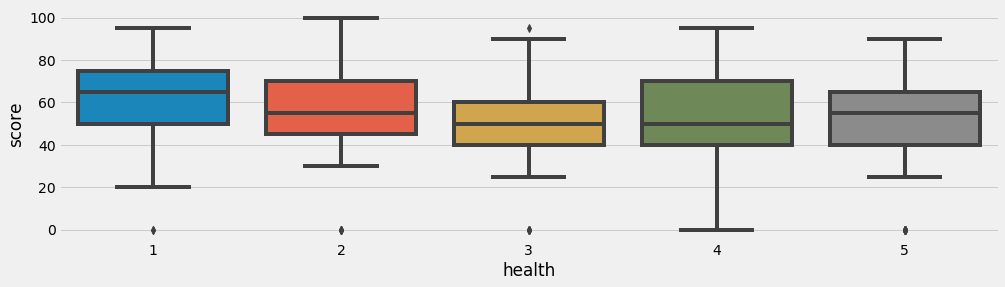

In [39]:
# *** Анализ категориальных (номинативных) признаков через box-plot ***


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(15, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=0)
    plt.show()


for col in df.columns:
    if not col in ['score', 'age', 'absences']:
        get_boxplot(col)

In [40]:
# *** Student's t-test (используется для нормально распределенных признаков) ***


cols_t_test = []


def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            cols_t_test.append(column)
            break


for col in df.columns:
    if not col in ['score', 'age', 'absences']:
        get_stat_dif(col)

print('Найдены статистически значимые различия для следующих признаков:\n',
      str(cols_t_test).strip('[]'))

Найдены статистически значимые различия для следующих признаков:
 'sex', 'address', 'Medu', 'Mjob', 'failures', 'paid', 'higher', 'romantic'


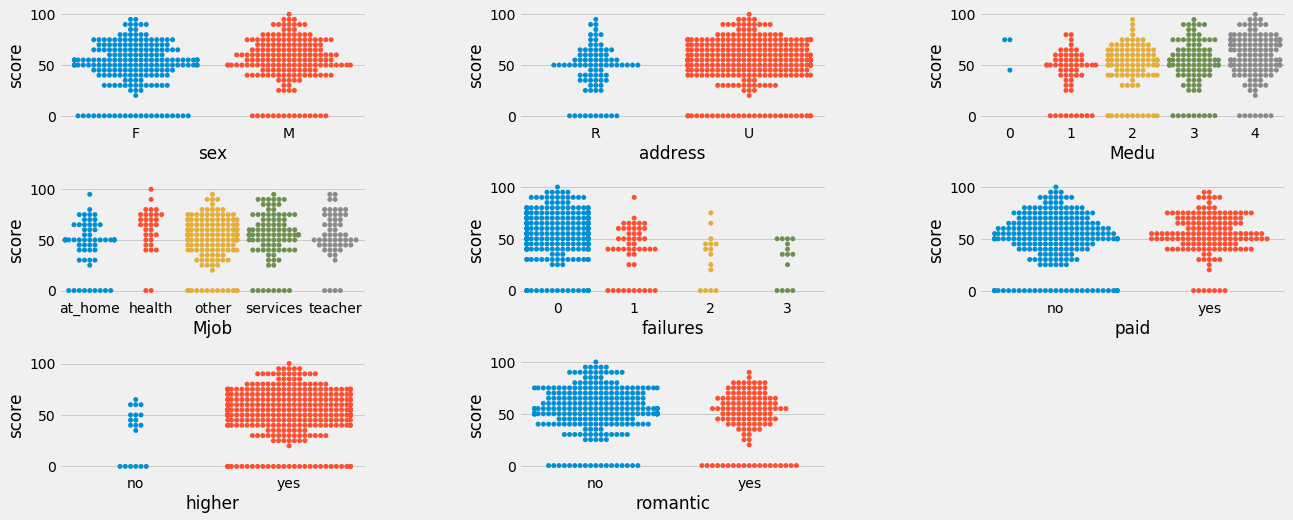

In [41]:
# Визуализация зависимых признаков, выявленных по тесту Стьюдента


target = 'score'
rows_num = math.ceil(len(cols_t_test)/3)
cols_num = 3

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(right=1.5, wspace=0.5, hspace=0.5)

for index, col in enumerate(cols_t_test):
    ax = fig.add_subplot(rows_num, cols_num, index+1)
    sns.swarmplot(x=df[col], y=df[target])

# Выводы 

In [42]:
# *** Формируем итоговый датасет со значимыми признаками ***

df_for_model = df.loc[:, cols_t_test]
df_for_model.head()

,sex,address,Medu,Mjob,failures,paid,higher,romantic
0,F,U,4,at_home,0,no,yes,no
1,F,U,1,at_home,0,no,yes,no
2,F,U,1,at_home,3,no,yes,no
3,F,U,4,health,0,yes,yes,yes
4,F,U,3,other,0,yes,yes,no


### Итак, в результате EDA влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:


- В данных достаточно много пустых значений, например признаки `Pstatus` и `paid` содержали порядка **10%** пустых значений. Так как объектов с пустыми значениями много, то удалять их нецелесообразно и нужно их заполнить. Для большинства признаков при заполнении выбиралось медиана или мода. 


- Выбросы найдены только в признаке `absences`, но было удалено только одно максимальное значений `absence`, так как оно больше чем количество дней в году. Остальные вполне могли быть реальным числом пропусков студентов.


- Есть небольшая отрицательная корреляция между `age` и `score` (-0.154225), что потенциально может указывать, что более юные студенты имеют немного лучше балы, чем их более старшие сокурсники. Но скорее всего это ложная корреляция, так как количество учеников более старшего возраста меньше, чем младшего, что влияет на такую корреляцию.


- Корреляция между `score` и `absences` совсем незначительная (0.006584). Вместе с предыдущим пунктом это означает что можно не рассматривать количественные признаки в качестве влияющих на оценку


- Самые важные признаки, влияющие на оценку и которые предлагается использовать в дальнейшем для построения модели, это `sex`, `address`, `Medu`, `Mjob`, `failures`, `paid`, `higher`, `romantic`.


- Если сделать анализ без наблюдений где `score` = 0, то немного меняется набор категориальных признаков, влияющих на оценку. Например `romantic` перестает влиять на оценку (видимо большинство кто в романтических отношениях не сдавал экзамены по тем или иным причинам).